In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

In [ ]:
df = pd.read_csv('Advertising.csv')

In [ ]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
df = df.drop ('Unnamed: 0', axis = 1)

In [18]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
df.shape

(200, 4)

In [20]:
df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [21]:
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [24]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

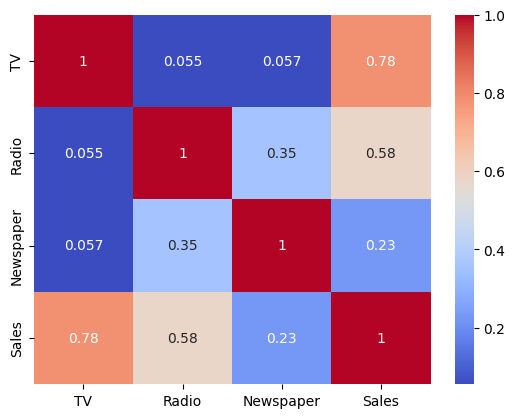

In [25]:
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [26]:
x=df.drop('Sales',axis=1) #input
y=df['Sales'] #target variable

In [27]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_Test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=8)

In [30]:
x_train.shape, x_Test.shape, y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [31]:
x_train

,TV,Radio,Newspaper
40,202.5,22.3,31.6
4,180.8,10.8,58.4
196,94.2,4.9,8.1
111,241.7,38.0,23.2
141,193.7,35.4,75.6
...,...,...,...
136,25.6,39.0,9.3
133,219.8,33.5,45.1
105,137.9,46.4,59.0
84,213.5,43.0,33.8


In [32]:
from sklearn.linear_model import LinearRegression

#initialize the model
model=LinearRegression()

#train the model
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.coef_

array([ 0.04564373,  0.18460931, -0.00366402])

In [34]:
model.intercept_

3.1645341174401835

In [35]:
y_pred=model.predict(x_Test)

In [36]:
y_pred

array([12.1621681 , 21.06478289, 18.51830935, 13.5045794 ,  8.02752064,
       11.6334744 , 22.25397982,  6.92206398, 14.03418589,  6.74517528,
       18.07445623, 15.43936529, 19.21914008, 10.05970639, 12.53365301,
       12.28557909, 17.12266381, 18.40723065, 20.39183906, 14.85068572,
       21.67261666, 10.47513658, 16.60889838,  9.88613131, 19.70218023,
       13.92705225, 20.00325895, 20.77556454, 15.29595289,  8.89599926,
        7.52077087, 15.04990973, 12.11476536, 15.73895563, 23.6201299 ,
       19.0368081 , 17.48957926, 20.59495111, 13.87394025, 16.54750829])

In [37]:
y_pred.shape

(40,)

In [38]:
df2=pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

In [39]:
df2

,Actual,Predicted
67,13.4,12.162168
69,22.3,21.064783
193,19.6,18.518309
161,13.3,13.504579
65,9.3,8.027521
88,12.9,11.633474
128,24.7,22.253980
119,6.6,6.922064
181,12.2,14.034186
117,9.4,6.745175


In [40]:
df2['Error']=abs(df2['Actual']-df2['Predicted'])

In [41]:
df2

,Actual,Predicted,Error
67,13.4,12.162168,1.237832
69,22.3,21.064783,1.235217
193,19.6,18.518309,1.081691
161,13.3,13.504579,0.204579
65,9.3,8.027521,1.272479
88,12.9,11.633474,1.266526
128,24.7,22.253980,2.446020
119,6.6,6.922064,0.322064
181,12.2,14.034186,1.834186
117,9.4,6.745175,2.654825


In [42]:
df2['Error'].mean() #mean absolute error

1.4627135343553939

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
mean_absolute_error(y_test,y_pred)

1.4627135343553939

In [45]:
df2['sse']=(df2['Actual']-df2['Predicted'])**2

In [46]:
df2

,Actual,Predicted,Error,sse
67,13.4,12.162168,1.237832,1.532228
69,22.3,21.064783,1.235217,1.525761
193,19.6,18.518309,1.081691,1.170055
161,13.3,13.504579,0.204579,0.041853
65,9.3,8.027521,1.272479,1.619204
88,12.9,11.633474,1.266526,1.604087
128,24.7,22.253980,2.446020,5.983015
119,6.6,6.922064,0.322064,0.103725
181,12.2,14.034186,1.834186,3.364238
117,9.4,6.745175,2.654825,7.048094


In [47]:
sum(df2['sse'])

172.71561451636313

In [48]:
df2['SST']=(df2['Actual']-df2['Actual'].mean())**2

In [49]:
df2['SST']=(df2['Actual']-df2['Actual'].mean())**2

In [50]:
R2=1-(df2['sse'].sum()/df2['SST'].sum())
print(R2)

0.8460595754263388


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_absolute_error(y_test,y_pred)
r2_score(y_test,y_pred)

0.8460595754263388

In [52]:
#pickle to encrypt
import pickle #serialization and deserialization of the model file
pickle.dump(model,open('Assignment3ADV.pkl','wb')) #wb mean